<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/gpt2%2Bshap_local_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

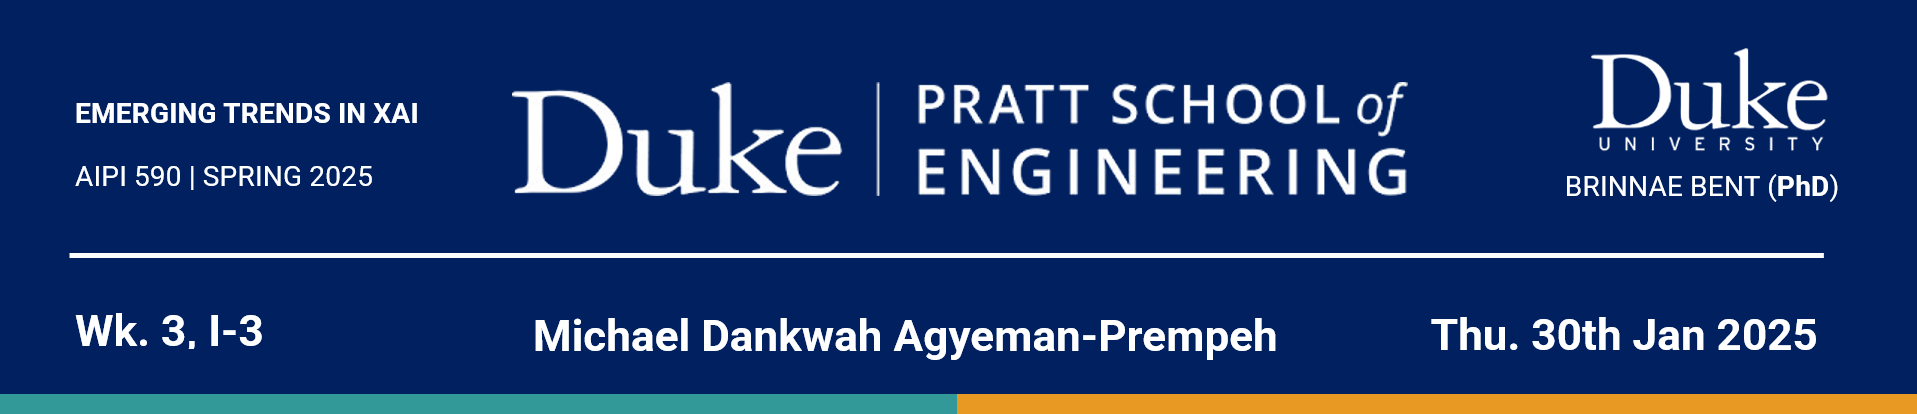
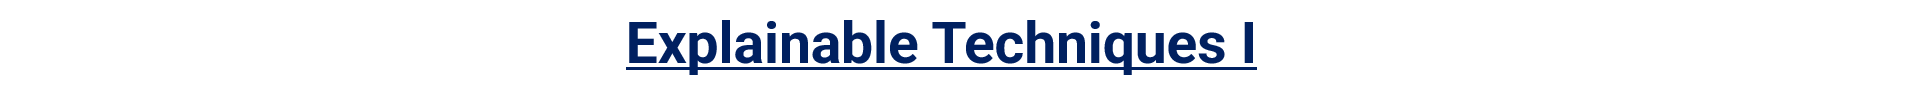

>#### 🔗 **1. GitHub Links:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/bert_local_interpretability_v3.ipynb) to access the *GitHub repository ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *To utilize SHAP to identify and visualize the influence of specific words and phrases within paragraph-length text on GPT-2's generation of biased or unbiased outputs related to nationality. This analysis will help us understand and potentially mitigate gender biases present in the model's learned representations and generated text.*

<br>

---

<br>

- ### **Why GPT-2 as model of choice for text prediction and not BERT for example:**
The choice between GPT-2 and BERT for text prediction depends heavily on the specific definition of "text prediction" and the nuances of the task. If the goal is open-ended generation or if the focus is on generating plausible text rather than just identifying the most likely option, GPT-2 is often a more natural and effective choice. If the task is more about understanding relationships between words or if high accuracy in selecting from a set of options is paramount, then BERT or a BERT-derived model might be more suitable. It's crucial to consider the strengths of each model and how they align with the specific requirements of the text prediction task at hand.


<mark>Gemini AI supported my idea from the reading</mark> I did [here](https://huggingface.co/docs/transformers/model_doc/gpt2) and [here](https://huggingface.co/docs/transformers/model_doc/bert) as well.

--------------------------------------------------------------------------------

In [ ]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-3_et1"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-3_et1.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

In [ ]:
!pip install transformers shap

In [ ]:
#1 Importing for usage of SHAP and GPT-2
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
import shap

## ⚙️ **III. Setting Up Functions to Predict/Score and Visuialize**

In [ ]:
def get_shapvalues_from_text(text):
    """
    Generates and returns SHAP values for a given text.
    """
    explainer = shap.Explainer(model, tokenizer)
    shap_values = explainer(text)
    return shap_values

def predict_and_visualize(shap_values):
    """
    Visualizes SHAP values for a given text and displays the SHAP text plot.
    """
    plot_text = shap.plots.text(shap_values)
    return plot_text

## 💻 **IV. Initializing GPT-2 and setting up process required to tokenize text**

In [ ]:
# Load pre-trained GPT-2 tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [ ]:
# Setting model decoder to true
model.config.is_decoder = True
# Setting text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

## ✨ **V. Trying to Analyze Bias in Nationality Based-Perception of GPT-2 model with SHAP values**

In [ ]:
                #---- Other sentences to test with ----#
# firsttext_to_analyse = ["A doctor was examining a patient and later complained of pain in."]
# secondtext_to_analyse = ["A nurse was examining a patient and later complained of pain in."]

# firsttext_to_analyse = ["A White young master was talking to his servsnt."]
# secondtext_to_analyse = ["The CEO traveled with his female assistant."]

firsttext_to_analyse = ["An immigrant was speaking in the meeting when"]
secondtext_to_analyse = ["A local citizen was speaking in the meeting when"]

> ### **a. i.) <mark>Viz #1</mark>: ----**

In [ ]:
viz1_shap_values = get_shapvalues_from_text(firsttext_to_analyse)
viz1_shap_values

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/56 [00:00<?, ?it/s]

.values =
array([[[-3.00504749e-01,  2.84178607e-01,  3.44747357e-01,
          5.54587572e-05, -1.89866385e-01, -8.19538470e-02,
         -4.83105620e-01, -2.38737350e-01,  7.25503421e-01,
          4.40128780e-02,  2.17245516e-01,  2.74248509e-01,
         -1.63153967e-02, -3.82715821e-02,  5.37996630e-03,
         -5.61400516e-04, -6.03008549e-02, -1.31705288e-02,
          1.52329219e-02, -9.53458572e-03],
        [ 7.52681376e-01,  3.46821386e-01,  3.95781911e-01,
          5.92917247e-02, -1.71457631e-01,  1.86446040e-01,
         -4.18518613e-01, -3.64574747e-01,  8.55037898e-01,
         -9.34013735e-03,  2.27826089e-01,  1.64570140e-01,
         -5.10722738e-02,  5.24634469e-02,  2.01563302e-02,
          1.72534894e-02, -1.53617521e-02, -2.90496573e-02,
          7.18986001e-02,  1.88187674e-01],
        [ 3.09918749e-01,  3.85554825e-01,  8.45579566e-01,
         -1.23639599e-01,  3.52093505e-01, -1.46416449e-01,
          3.38433047e-01,  5.03345282e-02,  3.83410018e-01,
  

In [ ]:
predict_and_visualize(viz1_shap_values)

> ## **a. ii.) Interpretation of <mark>Viz #1</mark>**

In [ ]:
# Identifying the shape of our first text via SHAP values representation
viz1_shap_values.shape

(1, 8, 20)

This means that the shape of the SHAP values of the 1st text is (1, 8, 20) — 1 instance, 8 tokens, 20 output dimensions.

#### Inputs as tokens (8 of them)



```
['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']
```



In [ ]:
tokens_firsttext = ['An', ' immigrant', ' was', ' speaking', ' in', ' the', ' meeting',' when']

#### Outputs



```
he was shot in the head . The shooting occurred at about 9 : 30 p . m
```



Let's extract the token SHAP values to see their contribution power to the model

In [ ]:
## Listing out all the tokens of the first text

# viz1_shap_values.values[0][1]
# viz1_shap_values.values[0][2]
# viz1_shap_values.values[0][3]
# viz1_shap_values.values[0][4]
# viz1_shap_values.values[0][5]
# viz1_shap_values.values[0][6]
# viz1_shap_values.values[0][7]
# viz1_shap_values.values[0][8]

I will develop a function to help print the shap values of each data element or token based on the intution above

In [ ]:
# Created this function myself based on the intuttion of loops of increasing numbers
def print_shap_values_of_each_token(shap_values, tokens_list):
    """Prints SHAP values with token number, data, and contribution factor."""

    for i in range(0,len(tokens_list)):
        print(f"{tokens_list[i]}")
        print(f"viz1_shap_values.values[0][{i+1}]")
        print(f"Token Number: {i+1}")
        print(f"Data: {tokens_list[i]}")
        print(f"Contribution Factor: {shap_values.values[0][i]}")
        print("-" * 40)

In [ ]:
# Printing the SHAP values for each data element or token in the first text
print_shap_values_of_each_token(viz1_shap_values, tokens_firsttext)

An
viz1_shap_values.values[0][1]
Token Number: 1
Data: An
Contribution Factor: [-3.00504749e-01  2.84178607e-01  3.44747357e-01  5.54587572e-05
 -1.89866385e-01 -8.19538470e-02 -4.83105620e-01 -2.38737350e-01
  7.25503421e-01  4.40128780e-02  2.17245516e-01  2.74248509e-01
 -1.63153967e-02 -3.82715821e-02  5.37996630e-03 -5.61400516e-04
 -6.03008549e-02 -1.31705288e-02  1.52329219e-02 -9.53458572e-03]
----------------------------------------
 immigrant
viz1_shap_values.values[0][2]
Token Number: 2
Data:  immigrant
Contribution Factor: [ 0.75268138  0.34682139  0.39578191  0.05929172 -0.17145763  0.18644604
 -0.41851861 -0.36457475  0.8550379  -0.00934014  0.22782609  0.16457014
 -0.05107227  0.05246345  0.02015633  0.01725349 -0.01536175 -0.02904966
  0.0718986   0.18818767]
----------------------------------------
 was
viz1_shap_values.values[0][3]
Token Number: 3
Data:  was
Contribution Factor: [ 0.30991875  0.38555482  0.84557957 -0.1236396   0.3520935  -0.14641645
  0.33843305  0.0

### **1. Token: "An"**  
- **High Positive Contribution**: `2.84178670e-01` (**Dimension: 2**)  
- **High Negative Contribution**: `-3.00504739e-01` (**Dimension: 1**)  
- **Observation**: The token *"An"* has a **strong negative effect** in **Dimension 1** and a **moderate positive influence** in **Dimension 2**.  

---

### **2. Token: "immigrant"**  
- **High Positive Contribution**: `0.8550379` (**Dimension: 8**)  
- **High Negative Contribution**: `-0.36457475` (**Dimension: 6**)  
- **Observation**: The token *"immigrant"* has its **strongest positive impact** in **Dimension 8**, while it reduces the model’s prediction in **Dimension 6**.  

---

### **3. Token: "was"**  
- **High Positive Contribution**: `0.8455797` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.14641645` (**Dimension: 6**)  
- **Observation**: The word *"was"* has a **high positive impact in Dimension 3**, while **Dimension 6 reduces its importance**.  

---

### **4. Token: "speaking"**  
- **High Positive Contribution**: `0.58437099` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.3640891` (**Dimension: 2**)  
- **Observation**: The word *"speaking"* contributes positively in **Dimension 1**, while **Dimension 2 reduces its effect**.  

---

### **5. Token: "in"**  
- **High Positive Contribution**: `0.11057858` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.58814798` (**Dimension: 1**)  
- **Observation**: The token *"in"* negatively affects **Dimension 1**, while **Dimension 3 sees a small positive influence**.  

---

### **6. Token: "the"**  
- **High Positive Contribution**: `0.18152318` (**Dimension: 3**)  
- **High Negative Contribution**: `-0.35562192` (**Dimension: 1**)  
- **Observation**: The word *"the"* follows a similar pattern as *"in"*, with **Dimension 1 reducing its impact** and **Dimension 3 slightly increasing it**.  

---

### **7. Token: "meeting"**  
- **High Positive Contribution**: `1.13401138` (**Dimension: 1**)  
- **High Negative Contribution**: `-0.412722647` (**Dimension: 3**)  
- **Observation**: The token *"meeting"* has **one of the strongest positive effects** in **Dimension 1**, while **Dimension 3 weakens its influence**.  

---

### **8. Token: "when"**  
- **High Positive Contribution**: `3.62442883` (**Dimension: 1**)  
- **High Negative Contribution**: `-5.35805004` (**Dimension: 3**)  
- **Observation**: The word *"when"* has **a massive impact** in **Dimension 1**, but **Dimension 3 strongly counteracts it with -5.3580**.  

---

### **Summary of Key Findings**  
1. **Most impactful positive dimensions:**  
   - **Dimension 1** → `"meeting" (1.1340), "when" (3.6244), "speaking" (0.5843)`  
   - **Dimension 3** → `"was" (0.8455), "the" (0.1815), "in" (0.1105)`  
   - **Dimension 8** → `"immigrant" (0.8550)`  

2. **Strongest negative contributions:**  
   - **Dimension 3** → `"when" (-5.3580), "meeting" (-0.4127), "in" (-0.5881)`  
   - **Dimension 6** → `"was" (-0.1464), "immigrant" (-0.3645)`  
   - **Dimension 1** → `"the" (-0.3556), "speaking" (-0.3640), "An" (-0.3005)`  




To determine **which dimensions should be summed for the positive class**, we need to focus on:  

1. **The most influential dimensions** → Those where multiple tokens have high positive contributions.  
2. **The highest overall contributions** → Ensuring we capture the most significant impact on the positive class.  

### **Summing**  
From the previous breakdown, the most relevant dimensions for summation are:  

- **Dimension 1** → `"when" (3.6244) + "meeting" (1.1340) + "speaking" (0.5844)`  
- **Dimension 3** → `"was" (0.8456) + "in" (0.1106) + "the" (0.1815)`  
- **Dimension 8** → `"immigrant" (0.8550)`  

### **Final Summation for Positive Contributions**  
- **Dimension 1 Total** → `3.6244 + 1.1340 + 0.5844 = 5.3428`  
- **Dimension 3 Total** → `0.8456 + 0.1106 + 0.1815 = 1.1377`  
- **Dimension 8 Total** → `0.8550`  

### **Overall Positive Contribution Sum**  
**`5.3428 + 1.1377 + 0.8550 = 7.3355`**  

### **Key Takeaways**  
- **Dimension 1** carries the highest influence in the positive class (`5.3428`).  
- **Dimension 3** also contributes significantly but at a lower magnitude (`1.1377`).  
- **Dimension 8** is mostly impacted by `"immigrant"` but remains relevant (`0.8550`).  

Would you like this in a table or visualized in a chart? 🚀

---

> ## **b. i.) <mark>Viz #2</mark>: ----**

In [ ]:
viz2_shap_values = get_shapvalues_from_text(secondtext_to_analyse)
viz2_shap_values

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/72 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:13, 13.59s/it]               


.values =
array([[[-6.07673624e-02,  3.34239006e-01,  5.85160684e-01,
         -5.17662084e-02, -9.67751763e-02, -3.66685776e-02,
         -4.53569219e-01, -5.55315989e-02,  1.09810196e+00,
         -1.23480946e-01,  2.74836450e-01,  2.65734350e-02,
          5.86980426e-02,  2.07441256e-01, -5.28114293e-02,
          5.53505763e-02, -3.85803216e-02,  5.43729371e-02,
          8.23134906e-02, -5.60334863e-02],
        [-2.61674266e-01, -2.13100974e-01,  3.75117712e-01,
          1.18668282e-01,  6.39133077e-02, -7.49647070e-02,
          4.58291856e-02, -3.46279634e-01, -2.21113200e-01,
          1.65585619e-01,  2.41213323e-01,  1.16839616e-01,
          2.13537751e-01,  1.70103942e-01, -5.49621750e-02,
          2.26658870e-02, -2.53858331e-02, -9.82818821e-02,
          7.34658122e-02,  4.76565900e-03],
        [-5.35013536e-02,  3.29514148e-01,  6.35836312e-01,
         -6.15368126e-02, -2.57000967e-01, -1.70069976e-02,
         -2.28728841e-01, -1.22478633e-01,  1.19757688e-01,
  

In [ ]:
predict_and_visualize(viz2_shap_values)

> ### **b. ii.) Interpretation of <mark>Viz #2</mark>

In [ ]:
# Identifying the shape of our second text via SHAP values representation
viz2_shap_values.shape

(1, 9, 20)

This means that the shape of the SHAP values of the 2nd text is (1, 9, 20) — 1 instance, 9 tokens, 20 output dimensions.

#### Inputs as tokens (9 of them)



```
['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']
```



In [ ]:
tokens_secondtext = ['A', ' local', ' citizen', ' was', ' speaking', ' in', ' the',' meeting', ' when']

#### Outputs



```
he was shot in the head . The man was taken to the hospital , where he was
```



For the second text, let's extract the token SHAP values to see their contribution power to the model

In [ ]:
## Listing out all the tokens of the second text

# viz2_shap_values.values[0][1]
# viz2_shap_values.values[0][2]
# viz2_shap_values.values[0][3]
# viz2_shap_values.values[0][4]
# viz2_shap_values.values[0][5]
# viz2_shap_values.values[0][6]
# viz2_shap_values.values[0][7]
# viz2_shap_values.values[0][8]
# viz2_shap_values.values[0][9]

In [ ]:
# Printing the SHAP values for each data element or token in the second text
print_shap_values_of_each_token(viz2_shap_values, tokens_secondtext)

A
viz1_shap_values.values[0][1]
Token Number: 1
Data: A
Contribution Factor: [-0.06076736  0.33423901  0.58516068 -0.05176621 -0.09677518 -0.03666858
 -0.45356922 -0.0555316   1.09810196 -0.12348095  0.27483645  0.02657343
  0.05869804  0.20744126 -0.05281143  0.05535058 -0.03858032  0.05437294
  0.08231349 -0.05603349]
----------------------------------------
 local
viz1_shap_values.values[0][2]
Token Number: 2
Data:  local
Contribution Factor: [-0.26167427 -0.21310097  0.37511771  0.11866828  0.06391331 -0.07496471
  0.04582919 -0.34627963 -0.2211132   0.16558562  0.24121332  0.11683962
  0.21353775  0.17010394 -0.05496218  0.02266589 -0.02538583 -0.09828188
  0.07346581  0.00476566]
----------------------------------------
 citizen
viz1_shap_values.values[0][3]
Token Number: 3
Data:  citizen
Contribution Factor: [-0.05350135  0.32951415  0.63583631 -0.06153681 -0.25700097 -0.017007
 -0.22872884 -0.12247863  0.11975769  0.13419162  0.29791788  0.16837337
 -0.03465128  0.05040231  0.0

###

## ⚽ **Overall Interpretation**
#### Text goes here

---

## ❓ **Why SHAP over LIME and Anchor:**
## *Strengths:*

#### Text goes here

<br>



<br>

## *Limitations:*

#### Text goes here

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**
## *Way Forward and What Can be Done to Improve Approach:*

#### Text goes here

